## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy. Here are the objectives:

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np

In [2]:
# our toy data for this task
x = np.random.uniform(0, 10, size=20)
temp = 1.3*x + 15 + np.random.normal(0, 1, size=20)

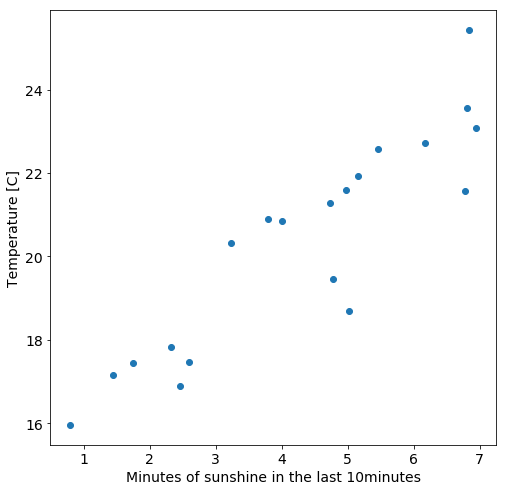

In [3]:
plt.plot(x, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10minutes")
plt.ylabel("Temperature [C]");

In [19]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        y_pred = np.dot(self.W,X) + self.b
        return y_pred
    
    def grad_loss(self, x, y_true):
        # TODO?: compute gradient with respect to W and b for one sample x
        # and the true value y_true
        grad_b = 0
        grad_W = 0

        #calculating the change for each point
        grad_b += - 2 * (y_true - ((self.W*x) + self.b))
        grad_W += - 2 * x * (y_true - ((self.W * x) + self.b))
        
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # TODO: compute one step of the gradient descent update, update W and b
        grads = self.grad_loss(x, y)
        
        self.W = self.W - (learning_rate * grads['W'])
        self.b = self.b - (learning_rate * grads['b'])
        
    def loss(self, x, y):
        y_pred = self.predict(x)
        loss = (y - y_pred)**2
        
        return loss

    def accuracy(self, X, y):          
        acc = self.loss(X, y)    
        ols = np.sum(acc)/len(X)

        return ols

Questions:

* how do you know that you trained for enough epochs?
* visualise how the loss changes over the epochs
* are more epochs always better? How could you show this?
* change the setup to use stochastic gradient descent
* (bonus) visualise the values of W and b over the epochs
* (bonus) can you see a difference for the paths of W and b between SGD and normal GD?

In [20]:
lr = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

initial value of W: -0.4869 and b: -0.4587


In [21]:
# Train for one epoch
learning_rate = 0.001
for epoch in range(1,10):
    for i, (x_, y_) in enumerate(zip(x, temp)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(x, temp)
        print("Update: train accuracy: %.4f"% (train_acc), end=' ')
        print('value of W: %.4f and b: %.4f' % (lr.W, lr.b))

Update: train accuracy: 467.9838 value of W: -0.1634 and b: -0.4063
Update: train accuracy: 416.8112 value of W: 0.0974 and b: -0.3585
Update: train accuracy: 410.8028 value of W: 0.1232 and b: -0.3260
Update: train accuracy: 354.3465 value of W: 0.4373 and b: -0.2799
Update: train accuracy: 340.0585 value of W: 0.5167 and b: -0.2477
Update: train accuracy: 312.6972 value of W: 0.6811 and b: -0.2150
Update: train accuracy: 304.2536 value of W: 0.7283 and b: -0.1823
Update: train accuracy: 261.4280 value of W: 1.0107 and b: -0.1410
Update: train accuracy: 242.4130 value of W: 1.1413 and b: -0.1066
Update: train accuracy: 220.6022 value of W: 1.3009 and b: -0.0745
Update: train accuracy: 211.0731 value of W: 1.3700 and b: -0.0448
Update: train accuracy: 197.6597 value of W: 1.4732 and b: -0.0129
Update: train accuracy: 178.9267 value of W: 1.6303 and b: 0.0103
Update: train accuracy: 172.5205 value of W: 1.6813 and b: 0.0395
Update: train accuracy: 159.7782 value of W: 1.7942 and b: 0.06

______________________
[  1.40396396   1.79731735   2.19067074   2.58402413   2.97737752
   3.37073091   3.7640843    4.15743769   4.55079108   4.94414446
   5.33749785   5.73085124   6.12420463   6.51755802   6.91091141
   7.3042648    7.69761819   8.09097158   8.48432497   8.87767836
   9.27103175   9.66438513  10.05773852  10.45109191  10.8444453
  11.23779869  11.63115208  12.02450547  12.41785886  12.81121225
  13.20456564  13.59791903  13.99127242  14.3846258   14.77797919
  15.17133258  15.56468597  15.95803936  16.35139275  16.74474614
  17.13809953  17.53145292  17.92480631  18.3181597   18.71151309
  19.10486647  19.49821986  19.89157325  20.28492664  20.67828003
  21.07163342  21.46498681  21.8583402   22.25169359  22.64504698
  23.03840037  23.43175375  23.82510714  24.21846053  24.61181392
  25.00516731  25.3985207   25.79187409  26.18522748  26.57858087
  26.97193426  27.36528765  27.75864104  28.15199442  28.54534781
  28.9387012   29.33205459  29.72540798  30.11876137  

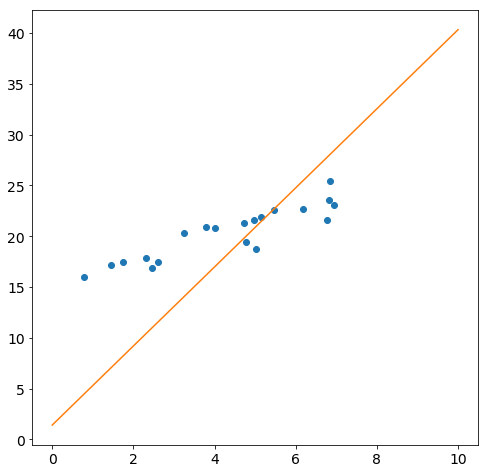

In [7]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr.predict(line));